In [1]:
import pandas as pd
import CococoNet_reader 
import pickle 
import tqdm
import Name_resolver
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
Name_resolver.species_name_resolver('Oryza sativa japonica')

'rice_jp'

In [3]:
species_with_nets = pd.read_csv('/data/passala/Generated_Tables/Reference_tables/Species_name_resolver.csv')
species_with_nets = species_with_nets[:18]
# # species_with_nets = species_with_nets.drop(index = [13,14])
# # species_with_nets.loc[0,'Taxa ID'] = 39947 
taxa_to_keep = species_with_nets['Taxa ID'].to_list()
taxa_to_keep

[4530,
 39947,
 3750,
 4558,
 4577,
 29760,
 3711,
 3847,
 3880,
 4097,
 4113,
 4081,
 3702,
 3818,
 4565,
 3659,
 1753,
 15368]

In [4]:
species_with_nets_to_run = species_with_nets.loc[~species_with_nets['Common Name'].isin(['rice','wheat','rapeseed'])]
species_with_nets_to_run

,Species,Taxa ID,Common Name
1,Oryza sativa japonica,39947,rice_jp
2,Malus domestica,3750,apple
3,Sorghum bicolor,4558,sorghum
4,Zea mays,4577,maize
5,Vitis vinifera,29760,grape
6,Brassica rapa,3711,mustard
7,Glycine max,3847,soybean
8,Medicago truncatula,3880,medicago
9,Nicotiana tabacum,4097,tobacco
10,Solanum tuberosum,4113,potato


In [5]:
species_with_nets_to_run.to_csv('/data/passala/Generated_Tables/Reference_tables/species_for_running_cross_ortho_analysis.csv',index = False)

In [6]:
og_groups = pd.read_csv('/data/passala/OrthoDB_data/NCBI_data/eukaryota_level_stuff/og_2_Genes_with_network_id.csv')
og_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
0,0at2759,15368_0:006377,15368,2759,15368_0:006377,psbD
1,0at2759,29760_0:006494,29760,2759,29760_0:006494,psbD
2,0at2759,3659_0:004e0f,3659,2759,3659_0:004e0f,psbD
3,0at2759,3702_0:006ad0,3702,2759,3702_0:006ad0,psbD
4,0at2759,3711_0:005e40,3711,2759,3711_0:005e40,LOC117126101
...,...,...,...,...,...,...
505254,9at2759,4097_0:00f00f,4097,2759,4097_0:00f00f,petD
505255,9at2759,4113_0:00079d,4113,2759,4113_0:00079d,LOC107063147
505256,9at2759,4113_0:006ebb,4113,2759,4113_0:006ebb,petD
505257,9at2759,4558_0:006df8,4558,2759,4558_0:006df8,petD


In [7]:
egad_scores = pd.read_csv('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/Orthogroups_at_eukaryote_level/Ortho_cross_all_tables/egad_scores_orthogroups_base_1.csv',index_col= 0)

In [8]:
egad_scores

,rice_jp AUC,rice_jp P_Value,apple AUC,apple P_Value,sorghum AUC,sorghum P_Value,maize AUC,maize P_Value,grape AUC,grape P_Value,...,tomato AUC,tomato P_Value,arabidopsis AUC,arabidopsis P_Value,peanut AUC,peanut P_Value,cucumber AUC,cucumber P_Value,brome AUC,brome P_Value
0at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000005at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.999910,0.022774,NaN,NaN,NaN,NaN
1000251at2759,0.500000,0.500000,0.918895,0.008907,0.950249,0.03586,NaN,NaN,0.956381,0.014631,...,NaN,NaN,0.983862,0.010065,0.970977,0.004855,NaN,NaN,NaN,NaN
1000411at2759,0.847470,0.082298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.529418,0.453167
10004at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.950597,0.014485,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999128at2759,0.748916,0.004395,0.677356,0.002132,0.781389,0.01260,0.742726,0.00087,0.728292,0.002450,...,0.693992,0.002274,0.524361,0.096362,0.796060,0.000002,0.786855,0.000112,0.762024,0.003996
999249at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.500000,NaN,NaN
999348at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.985562,0.026060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999732at2759,NaN,NaN,0.473355,0.457563,0.500000,0.50000,NaN,NaN,0.178873,0.075897,...,NaN,NaN,0.584168,0.358473,0.786390,0.022477,0.431321,0.391774,NaN,NaN


In [9]:
def get_fc_table(species_1,species_2):
    """Takes two species common names in any order and returns the N to M table for that pair with species_1 as column 1 and species_2 as column 2 

    Args:
        species_1 (str): species common name
        species_2 (str): species common name

    Returns:
        str: All N-M gene pairs
    """
    import pandas as pd
    import os 

    list_of_files = os.listdir('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/Orthogroups_at_eukaryote_level/1_1_ortho_SC_tables_eukaryote')
    trimmed_to_species_1 = list(filter(lambda x:species_1 in x, list_of_files))
    final_file = list(filter(lambda x: species_2 in x, trimmed_to_species_1))[0]
    formatted_final_file = f"/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/Orthogroups_at_eukaryote_level/1_1_ortho_SC_tables_eukaryote/{final_file}"
    read_in_file = pd.read_csv(formatted_final_file, index_col= 0)

    return read_in_file

In [10]:
current_table = get_fc_table('rice_jp','soybean')

In [11]:
current_table

,rice_jp and soybean,Species 1 Score,Species 2 Score,Total Score
0,1000251at2759,compatability col,compatability col,0.721404
1,1000582at2759,compatability col,compatability col,0.952544
2,1000700at2759,compatability col,compatability col,0.998158
3,1000728at2759,compatability col,compatability col,0.839167
4,10009at2759,compatability col,compatability col,0.581404
...,...,...,...,...
5695,997839at2759,compatability col,compatability col,0.844123
5696,997998at2759,compatability col,compatability col,0.705088
5697,998957at2759,compatability col,compatability col,0.942061
5698,999128at2759,compatability col,compatability col,0.944211


In [12]:
current_species_taxa = species_with_nets_to_run.loc[species_with_nets_to_run['Common Name'] == 'grape']['Taxa ID'].item()

In [13]:
current_og_groups = og_groups.loc[og_groups['Species']==current_species_taxa]
current_og_groups = current_og_groups.loc[current_og_groups['Orthogroup'].isin(egad_scores.index)]

In [14]:
current_og_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
1,0at2759,29760_0:006494,29760,2759,29760_0:006494,psbD
14,1000005at2759,29760_0:003bb2,29760,2759,29760_0:003bb2,LOC104881169
15,1000005at2759,29760_0:003c87,29760,2759,29760_0:003c87,LOC104881144
38,1000251at2759,29760_0:00157c,29760,2759,29760_0:00157c,LOC100242675
39,1000251at2759,29760_0:001e82,29760,2759,29760_0:001e82,LOC100242917
...,...,...,...,...,...,...
505148,999348at2759,29760_0:004a5c,29760,2759,29760_0:004a5c,LOC100852581
505189,999732at2759,29760_0:001906,29760,2759,29760_0:001906,LOC100255395
505190,999732at2759,29760_0:0026ee,29760,2759,29760_0:0026ee,LOC100264950
505191,999732at2759,29760_0:0056ed,29760,2759,29760_0:0056ed,LOC100248971


In [15]:
current_table

,rice_jp and soybean,Species 1 Score,Species 2 Score,Total Score
0,1000251at2759,compatability col,compatability col,0.721404
1,1000582at2759,compatability col,compatability col,0.952544
2,1000700at2759,compatability col,compatability col,0.998158
3,1000728at2759,compatability col,compatability col,0.839167
4,10009at2759,compatability col,compatability col,0.581404
...,...,...,...,...
5695,997839at2759,compatability col,compatability col,0.844123
5696,997998at2759,compatability col,compatability col,0.705088
5697,998957at2759,compatability col,compatability col,0.942061
5698,999128at2759,compatability col,compatability col,0.944211


In [16]:
current_table.columns[0]

'rice_jp and soybean'

In [17]:
merged_groups = current_og_groups.merge(how = 'left', left_on = "Orthogroup",right_on=current_table.columns[0], right = current_table.iloc[:,[0,3]]  )

In [18]:
merged_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol,rice_jp and soybean,Total Score
0,0at2759,29760_0:006494,29760,2759,29760_0:006494,psbD,NaN,NaN
1,1000005at2759,29760_0:003bb2,29760,2759,29760_0:003bb2,LOC104881169,NaN,NaN
2,1000005at2759,29760_0:003c87,29760,2759,29760_0:003c87,LOC104881144,NaN,NaN
3,1000251at2759,29760_0:00157c,29760,2759,29760_0:00157c,LOC100242675,1000251at2759,0.721404
4,1000251at2759,29760_0:001e82,29760,2759,29760_0:001e82,LOC100242917,1000251at2759,0.721404
...,...,...,...,...,...,...,...,...
22807,999348at2759,29760_0:004a5c,29760,2759,29760_0:004a5c,LOC100852581,NaN,NaN
22808,999732at2759,29760_0:001906,29760,2759,29760_0:001906,LOC100255395,999732at2759,0.903465
22809,999732at2759,29760_0:0026ee,29760,2759,29760_0:0026ee,LOC100264950,999732at2759,0.903465
22810,999732at2759,29760_0:0056ed,29760,2759,29760_0:0056ed,LOC100248971,999732at2759,0.903465


In [19]:
merged_groups.groupby('Orthogroup').mean().dropna()

/tmp/ipykernel_339759/735756621.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_groups.groupby('Orthogroup').mean().dropna()


,Species,Ortholevel,Total Score
Orthogroup,,,
1000251at2759,29760.0,2759.0,0.721404
1000582at2759,29760.0,2759.0,0.952544
1000700at2759,29760.0,2759.0,0.998158
1000728at2759,29760.0,2759.0,0.839167
10009at2759,29760.0,2759.0,0.581404
...,...,...,...
997839at2759,29760.0,2759.0,0.844123
997998at2759,29760.0,2759.0,0.705088
998957at2759,29760.0,2759.0,0.942061


/tmp/ipykernel_339759/1654839291.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.histplot(merged_groups.groupby('Orthogroup').mean().dropna()['Total Score'])


<AxesSubplot:xlabel='Total Score', ylabel='Count'>

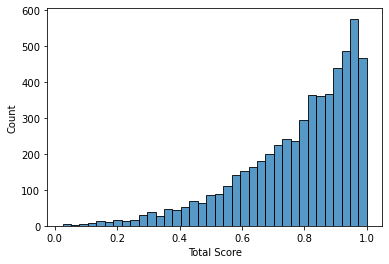

In [20]:
sns.histplot(merged_groups.groupby('Orthogroup').mean().dropna()['Total Score'])

In [21]:
all_fc_scores = pd.DataFrame(index = egad_scores.index)
all_fc_scores

""
0at2759
1000005at2759
1000251at2759
1000411at2759
10004at2759
...
999128at2759
999249at2759
999348at2759
999732at2759


In [22]:
list_of_species_to_run_on = species_with_nets_to_run['Common Name'].to_list()


In [23]:
plant_combinations = list(itertools.permutations(list_of_species_to_run_on,2))

In [24]:
for species in list_of_species_to_run_on:
    print(species)
    combos_that_start_with_species = []


    for combo in plant_combinations:
        if combo[0] == species:
            combos_that_start_with_species.append(combo)



    species_specific_df = pd.DataFrame(index = egad_scores.index)
    outer_loop_species_taxa = Name_resolver.species_name_resolver(species,'taxa_id' )
    current_og_groups = og_groups.loc[og_groups['Species']==outer_loop_species_taxa]
    current_og_groups = current_og_groups.loc[current_og_groups['Orthogroup'].isin(egad_scores.index)]
   
    



    for current_combination in combos_that_start_with_species:
        current_table =get_fc_table(current_combination[0],current_combination[1])
        current_species_taxa = species_with_nets_to_run.loc[species_with_nets_to_run['Common Name'] == current_combination[0]]['Taxa ID'].item()
        merged_groups = current_og_groups.merge(how = 'left', left_on = "Orthogroup",right_on=current_table.columns[0], right = current_table.iloc[:,[0,3]] )
        mean_fc = merged_groups[['Orthogroup','Total Score']].groupby('Orthogroup').mean()
        species_specific_df = species_specific_df.merge(right = mean_fc,left_index=True,right_index=True, how = 'left')
        species_specific_df = species_specific_df.rename(columns={'Total Score':current_combination[1]})

    mean_across_species = species_specific_df.mean(axis = 1)
    all_fc_scores[species] = mean_across_species



rice_jp
apple
sorghum
maize
grape
mustard
soybean
medicago
tobacco
potato
tomato
arabidopsis
peanut
cucumber
brome


In [25]:
current_table

,cucumber and brome,Species 1 Score,Species 2 Score,Total Score
0,1000251at2759,compatability col,compatability col,0.600422
1,10004at2759,compatability col,compatability col,0.966810
2,1000582at2759,compatability col,compatability col,0.722737
3,1000700at2759,compatability col,compatability col,0.980367
4,1000728at2759,compatability col,compatability col,0.588717
...,...,...,...,...
6744,997998at2759,compatability col,compatability col,0.921766
6745,998443at2759,compatability col,compatability col,0.763187
6746,998957at2759,compatability col,compatability col,0.775596
6747,999128at2759,compatability col,compatability col,0.889984


In [26]:
all_fc_scores

,rice_jp,apple,sorghum,maize,grape,mustard,soybean,medicago,tobacco,potato,tomato,arabidopsis,peanut,cucumber,brome
0at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000005at2759,NaN,NaN,NaN,NaN,0.621381,NaN,NaN,0.622440,NaN,NaN,NaN,NaN,0.545519,NaN,0.669365
1000251at2759,0.816980,0.749399,0.716694,0.656443,0.862407,0.710754,0.763108,0.824816,0.793693,0.787742,0.656196,0.826544,0.892291,0.633966,0.601789
1000411at2759,0.913736,0.859591,0.969214,0.843656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.896282
10004at2759,NaN,0.917191,0.890062,0.902302,0.891816,NaN,0.739141,0.868883,0.908130,0.698545,0.739628,0.885067,0.856265,0.897590,0.877939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999128at2759,0.936053,0.897077,0.895058,0.862616,0.844544,0.836994,0.823286,0.890376,0.917906,0.919625,0.908424,0.845264,0.872859,0.909500,0.821985
999249at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.505753,NaN,NaN,0.213143,NaN,NaN,0.410322,NaN
999348at2759,0.808186,NaN,0.799457,0.784944,0.781096,0.857205,NaN,NaN,NaN,NaN,0.873640,0.810869,NaN,NaN,NaN
999732at2759,0.827144,0.762572,0.805257,0.891227,0.872477,0.910427,0.909096,0.825760,0.865099,NaN,0.878951,0.883781,0.882192,0.896943,0.794750


In [27]:
egad_scores = egad_scores.replace(.5,np.nan)
egad_scores

,rice_jp AUC,rice_jp P_Value,apple AUC,apple P_Value,sorghum AUC,sorghum P_Value,maize AUC,maize P_Value,grape AUC,grape P_Value,...,tomato AUC,tomato P_Value,arabidopsis AUC,arabidopsis P_Value,peanut AUC,peanut P_Value,cucumber AUC,cucumber P_Value,brome AUC,brome P_Value
0at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000005at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.999910,0.022774,NaN,NaN,NaN,NaN
1000251at2759,NaN,NaN,0.918895,0.008907,0.950249,0.03586,NaN,NaN,0.956381,0.014631,...,NaN,NaN,0.983862,0.010065,0.970977,0.004855,NaN,NaN,NaN,NaN
1000411at2759,0.847470,0.082298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.529418,0.453167
10004at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.950597,0.014485,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999128at2759,0.748916,0.004395,0.677356,0.002132,0.781389,0.01260,0.742726,0.00087,0.728292,0.002450,...,0.693992,0.002274,0.524361,0.096362,0.796060,0.000002,0.786855,0.000112,0.762024,0.003996
999249at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999348at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.985562,0.026060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999732at2759,NaN,NaN,0.473355,0.457563,NaN,NaN,NaN,NaN,0.178873,0.075897,...,NaN,NaN,0.584168,0.358473,0.786390,0.022477,0.431321,0.391774,NaN,NaN


In [28]:
egad_scores = egad_scores.filter(regex = 'AUC')

In [29]:
15-egad_scores.isna().sum(axis = 1)

0at2759           0
1000005at2759     1
1000251at2759     9
1000411at2759     2
10004at2759       2
                 ..
999128at2759     15
999249at2759      1
999348at2759      1
999732at2759      6
9at2759           0
Length: 12689, dtype: int64

In [30]:
all_fc_scores

,rice_jp,apple,sorghum,maize,grape,mustard,soybean,medicago,tobacco,potato,tomato,arabidopsis,peanut,cucumber,brome
0at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000005at2759,NaN,NaN,NaN,NaN,0.621381,NaN,NaN,0.622440,NaN,NaN,NaN,NaN,0.545519,NaN,0.669365
1000251at2759,0.816980,0.749399,0.716694,0.656443,0.862407,0.710754,0.763108,0.824816,0.793693,0.787742,0.656196,0.826544,0.892291,0.633966,0.601789
1000411at2759,0.913736,0.859591,0.969214,0.843656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.896282
10004at2759,NaN,0.917191,0.890062,0.902302,0.891816,NaN,0.739141,0.868883,0.908130,0.698545,0.739628,0.885067,0.856265,0.897590,0.877939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999128at2759,0.936053,0.897077,0.895058,0.862616,0.844544,0.836994,0.823286,0.890376,0.917906,0.919625,0.908424,0.845264,0.872859,0.909500,0.821985
999249at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.505753,NaN,NaN,0.213143,NaN,NaN,0.410322,NaN
999348at2759,0.808186,NaN,0.799457,0.784944,0.781096,0.857205,NaN,NaN,NaN,NaN,0.873640,0.810869,NaN,NaN,NaN
999732at2759,0.827144,0.762572,0.805257,0.891227,0.872477,0.910427,0.909096,0.825760,0.865099,NaN,0.878951,0.883781,0.882192,0.896943,0.794750


In [31]:
final_plotting_frame = pd.DataFrame(index = egad_scores.index)
final_plotting_frame['EGAD Species Present'] = 15-egad_scores.isna().sum(axis = 1)
final_plotting_frame['FC Species Present'] = 15 - all_fc_scores.isna().sum(axis =1)
final_plotting_frame['AVG FC'] = all_fc_scores.mean(axis =1)
final_plotting_frame['AVG EGAD'] = egad_scores.mean(axis = 1)
final_plotting_frame

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD
0at2759,0,0,NaN,NaN
1000005at2759,1,4,0.614676,0.999910
1000251at2759,9,15,0.752855,0.961442
1000411at2759,2,5,0.896496,0.688444
10004at2759,2,13,0.851735,0.863988
...,...,...,...,...
999128at2759,15,15,0.878771,0.718219
999249at2759,1,3,0.376406,0.997687
999348at2759,1,7,0.816485,0.985562
999732at2759,6,14,0.857548,0.548545


In [32]:
trimmed_plotting_frame = final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>2) & (final_plotting_frame['FC Species Present']>2)]
trimmed_plotting_frame

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD
1000251at2759,9,15,0.752855,0.961442
1000582at2759,13,15,0.758454,0.593669
1000700at2759,14,15,0.913176,0.803344
1000728at2759,13,15,0.740301,0.929649
10009at2759,15,15,0.861740,0.565589
...,...,...,...,...
997839at2759,12,15,0.901551,0.796670
998443at2759,3,13,0.838040,0.926369
998957at2759,4,14,0.826050,0.947572
999128at2759,15,15,0.878771,0.718219


(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

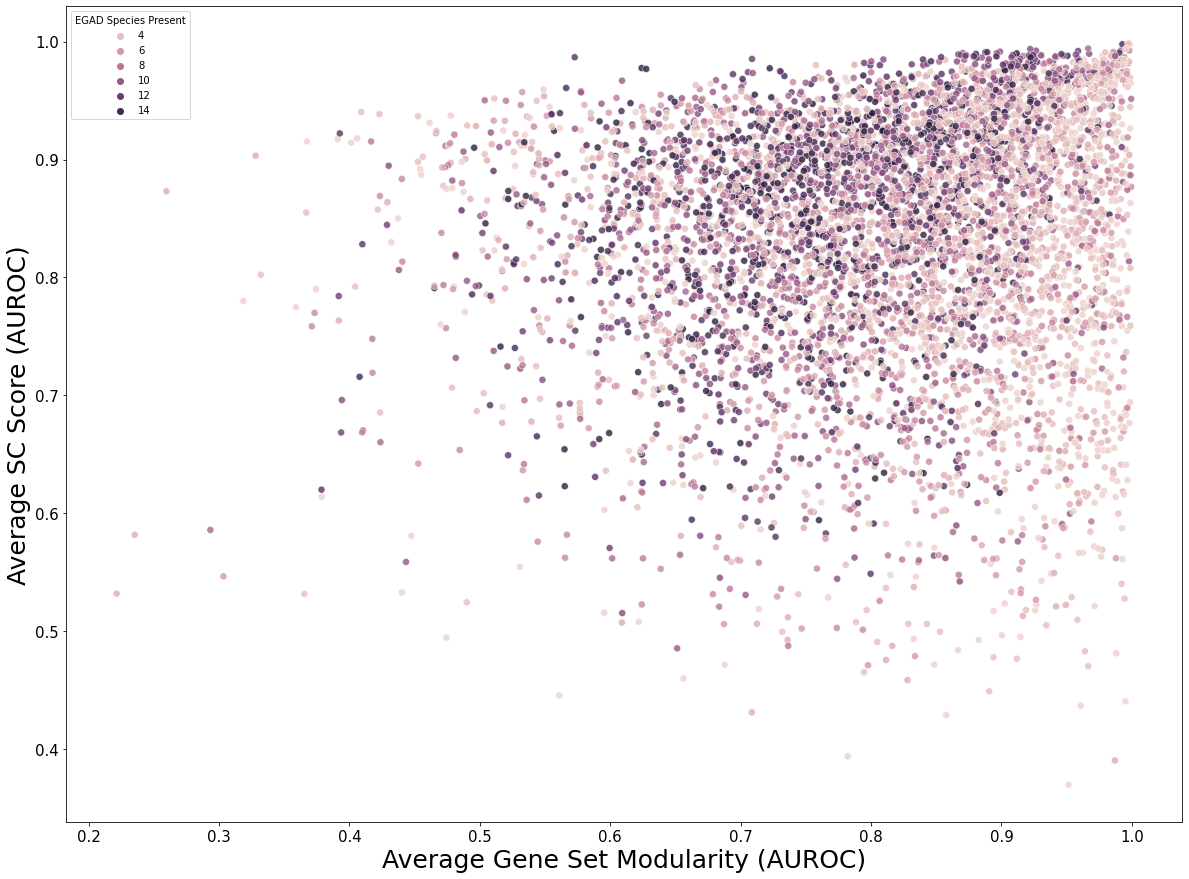

In [33]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = trimmed_plotting_frame,y = 'AVG FC',x = 'AVG EGAD',s = 50,color = 'dimgray', alpha = .8, hue = 'EGAD Species Present')

plt.ylabel("Average SC Score (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

In [36]:
trimmed_plotting_frame.loc[(trimmed_plotting_frame['EGAD Species Present']>10) &(trimmed_plotting_frame['AVG FC'] > .95) &(trimmed_plotting_frame['AVG EGAD'] < .65)]

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD
25313at2759,15,15,0.977598,0.624043
3145682at2759,13,15,0.952043,0.646480
5265755at2759,13,15,0.986774,0.572756
5314at2759,15,15,0.976819,0.627626
648032at2759,14,14,0.960715,0.566235


In [34]:
species_with_nets_to_run

,Species,Taxa ID,Common Name
1,Oryza sativa japonica,39947,rice_jp
2,Malus domestica,3750,apple
3,Sorghum bicolor,4558,sorghum
4,Zea mays,4577,maize
5,Vitis vinifera,29760,grape
6,Brassica rapa,3711,mustard
7,Glycine max,3847,soybean
8,Medicago truncatula,3880,medicago
9,Nicotiana tabacum,4097,tobacco
10,Solanum tuberosum,4113,potato


In [ ]:
testing_group_1 = og_groups.loc[(og_groups['Orthogroup'] == '871799at3193') &(og_groups['Species'] == 4081)]
testing_group_1

In [ ]:
testing_group_1 = og_groups.loc[(og_groups['Orthogroup'] == '121644at3193')]
testing_group_1['Species'].value_counts()

In [ ]:
arab_coconet = CococoNet_reader.read_cococonet('arabidopsis')
arab_coconet

In [ ]:
trimmed_arab_coconet = arab_coconet[(arab_coconet.columns.intersection(['AT5G38470','AT3G02540','AT1G16190','AT1G79650'])) ]
trimmed_arab_coconet_double = trimmed_arab_coconet[trimmed_arab_coconet.index.isin(['AT5G38470','AT3G02540','AT1G16190','AT1G79650'])]

In [ ]:
trimmed_arab_coconet

In [ ]:
trimmed_arab_coconet_double

In [ ]:
arab_coconet.loc[(arab_coconet.columns.intersection(['AT5G38470','AT3G02540','AT1G16190','AT1G79650']))& (arab_coconet.index.isin(['AT5G38470','AT3G02540','AT1G16190','AT1G79650']))]

In [ ]:
arab_coconet.loc[ara]

In [ ]:
""" Ideas for what is going on with EGAD
"""

In [ ]:
trimmed_plotting_frame.loc[(trimmed_plotting_frame['EGAD Species Present']>5) &(trimmed_plotting_frame['AVG FC'] > .9) &(trimmed_plotting_frame['AVG EGAD'] < .55)]

In [ ]:
egad_scores.loc['121644at3193']

In [ ]:
""" 
Example Groups Top Right multi species blob: 

110540at3193 = 40S Ribosomal protein
112234at3193 = 40s Ribosomal protein
121644at3193 = ER Ribophorin 
123085at3193 = Ribosomal Protein 
125780at3193 = 60s Ribosomal protein
126046at3193 = Mitochondrial HSP 
127467at3193 = Ubiquitin 40s ribosomal protein
129078at3193 = Nacent polypeptitde associated complex (ribosomal)
271918at3193 = Ribosomal protein 
61479at3193 = Homeobox ddt protein - maintains vegetative phase
698831at3193 = Mitochondrial nuclear organization
77203at3193 = WRKY transcription factor 
868100at3193 = Authophagy protein
868498at3193	= Acyl carrier protein (lipid movement?)
875262at3193  = DNA repair
"""

'''
Example group absolute top right 
120630at3193 = Master TF for stress response
124972at3193	 = chloroplastic oxygenase
127946at3193 = Herbivory/stress response
134498at3193 = Cell division protein
135359at3193 = Cyclin
138388at3193 = JHL protein???
351738at3193 = Drought stress
36946at3193 = Chlorophyll binding 
424934at3193 = Laccase (lignin?)
53144at3193 = Ultra violet response 

Example group top left 
10648at3193 = Exportin protein
116900at3193 = tubulin binding protien
117286at3193 = Unclear function required for embryo development 
118872at3193 = Proteosome 
121644at3193 = Post translational modifcation with glycan
126655at3193 = Heatshock stress protein? 
129826at3193 = Catabolite repressor


'''

In [ ]:
trimmed_plotting_frame['EGAD Species Present']

In [ ]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = trimmed_plotting_frame,y = 'AVG FC',x = 'AVG EGAD',s = 50,color = 'black', alpha = .25, )

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

In [ ]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>10) & (final_plotting_frame['FC Species Present']>10)],y = 'AVG FC',x = 'AVG EGAD',s = 50,color = 'black', alpha = .25,)

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

In [ ]:
final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>10) & (final_plotting_frame['FC Species Present']>10)]

In [ ]:
limited_set = pd.read_csv('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/Ortho_cross_all_tables/gene_based_over_10_species.csv',index_col= 0)

In [ ]:
limited_set = pd.read_csv('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/gene_based_all_species.csv',index_col= 0)

In [ ]:
final_plotting_frame.loc[final_plotting_frame.index.isin(limited_set.index)]

In [ ]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = final_plotting_frame.loc[final_plotting_frame.index.isin(limited_set.index)],y = 'AVG FC',x = 'AVG EGAD',s = 50,color = 'black', alpha = .25,)

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

In [ ]:
modded_plotting_frame = final_plotting_frame.loc[final_plotting_frame.index.isin(limited_set.index)].copy()

In [ ]:
modded_plotting_frame

In [ ]:
modded_plotting_frame = modded_plotting_frame.rename(columns = {'AVG FC':'ORTHO FC',})

In [ ]:
doubled_data = limited_set.merge(right = modded_plotting_frame[['ORTHO FC']], left_index=True, right_index= True)
doubled_data

In [ ]:
doubled_data['Improvement from ORTHO'] = doubled_data['ORTHO FC'] - doubled_data['AVG FC']
doubled_data

In [ ]:
doubled_data.mean()

In [ ]:
doubled_data.mean()

In [ ]:
fig, ax = plt.subplots(figsize = (20,15))
sns.kdeplot(data = final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>9) & (final_plotting_frame['FC Species Present']>9)],y = 'AVG FC',x = 'AVG EGAD',fill=True, thresh=0, levels=20, cmap="mako")

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

In [ ]:
current_table

In [ ]:
current_combination

In [ ]:
current_combination[0]

In [ ]:
cur

In [ ]:
current_table.loc[current_table['sorghum'].isin(current_og_groups['Symbol'].to_list())]

In [ ]:
current_og_groups

In [ ]:
current_og_groups.merge(how = 'left', left_on = "Symbol",right_on=current_combination[0], right = current_table[[current_combination[0],current_combination[1],'Total Score']] )

In [ ]:
merged_groups.head(50)

In [ ]:
current_species_taxa

In [ ]:
species_with_nets

In [ ]:
current_table

In [ ]:
all_fc_scores.sum().head(50)

In [ ]:
mean_fc = merged_groups[['Orthogroup','Total Score']].groupby('Orthogroup').mean()
mean_fc


In [ ]:
    species_specific_df = pd.DataFrame(index = egad_scores.index)


In [ ]:
species_specific_df.merge(right = mean_fc,left_index=True,right_index=True, how = 'left')


In [ ]:
species_specific_df

In [ ]:
all_group_annotations = pd.DataFrame(columns = ['Avg FC','Avg EGAD', 'Species Present'], index = og_groups['Orthogroup'].unique())

In [ ]:
all_group_annotations

In [ ]:
# for group in tqdm.tqdm(all_group_annotations.index):
#     genes = og_groups.loc[og_groups['Orthogroup'] == group]
#     num_species = len(genes['Species'].unique())
#     all_group_annotations.loc[group,'Species Present'] = num_species
all_group_annotations= pickle.load(open('/data/passala/Generated_Tables/Temp_junk/annotated_groups_with_numbers.p','rb'))


In [ ]:
all_group_annotations

In [ ]:
all_group_annotations.to_csv('/data/passala/Generated_Tables/Temp_junk/annotated_groups_with_number_species.csv')

In [ ]:
file_genes = open('/data/passala/Generated_Tables/Temp_junk/annotated_groups_with_numbers.p','wb')
pickle.dump(all_group_annotations,file_genes)
file_genes.close()

In [ ]:
all_orthogroups= pickle.load(open('/data/passala/Generated_Tables/Temp_junk/annotated_groups_with_numbers.p','rb'))


In [ ]:
over_3_groups_annotated = all_group_annotations.loc[all_group_annotations['Species Present']>3]
over_3_groups_annotated

In [ ]:
list_of_species = species_with_nets_to_run['Species'].to_list()
list_of_species

In [ ]:
egad_dataframe = pd.DataFrame(columns = list_of_species, index = over_3_groups_annotated.index,)
egad_dataframe

In [ ]:
for species in tqdm.tqdm(list_of_species):
    current_coconet = CococoNet_reader.read_cococonet(species)
    


In [ ]:
over_3_groups_annotated.

In [ ]:
all_group_annotations

In [ ]:
all_group_annotations

In [ ]:
num_species = len(genes['Species'].unique())
num_species

In [ ]:
genes